In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [2]:
# read data from our previous ILI example: https://pubmed.ncbi.nlm.nih.gov/36150651/
df =pd.read_csv("CEIRSProspective_example.csv",encoding='unicode_escape')
# To display the top 5 rows
df.head(5)

,Study ID,Data Access Group,Select Hospital System,Is the subject 5 years old or older?,Is the subject 20 years old or older?,What active surveillance group does the subject fall into?,Documented fever?,Report of fever?,New or increased cough?,Headache?,...,Influenza?.8,Viral Syndrome or Infection?.8,Pneumonia?.8,Myocardial Infarction?.8,Stroke?.9,How many final diagnoses did the subject have?.3,Final IP Diagnosis Code 1.3,Final IP Diagnosis Code 2.3,Final IP Diagnosis Code 3.3,Complete?.10
0,02-11-Pro-0001,JHHS,JHHS,Yes,NaN,Prospective Influenza Positive,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete
1,02-11-Pro-0002,JHHS,JHHS,Yes,NaN,Prospective Symptomatic Detection,Yes,Yes,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete
2,02-11-Pro-0003,JHHS,JHHS,Yes,NaN,Prospective Influenza Positive,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete
3,02-11-Pro-0004,JHHS,JHHS,Yes,NaN,Prospective Symptomatic Detection,Yes,Yes,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete
4,02-11-Pro-0005,JHHS,JHHS,Yes,NaN,Prospective Symptomatic Detection,Yes,Yes,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete


In [3]:
# raw data example  show usa and tw data
df

,Study ID,Data Access Group,Select Hospital System,Is the subject 5 years old or older?,Is the subject 20 years old or older?,What active surveillance group does the subject fall into?,Documented fever?,Report of fever?,New or increased cough?,Headache?,...,Influenza?.8,Viral Syndrome or Infection?.8,Pneumonia?.8,Myocardial Infarction?.8,Stroke?.9,How many final diagnoses did the subject have?.3,Final IP Diagnosis Code 1.3,Final IP Diagnosis Code 2.3,Final IP Diagnosis Code 3.3,Complete?.10
0,02-11-Pro-0001,JHHS,JHHS,Yes,NaN,Prospective Influenza Positive,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete
1,02-11-Pro-0002,JHHS,JHHS,Yes,NaN,Prospective Symptomatic Detection,Yes,Yes,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete
2,02-11-Pro-0003,JHHS,JHHS,Yes,NaN,Prospective Influenza Positive,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete
3,02-11-Pro-0004,JHHS,JHHS,Yes,NaN,Prospective Symptomatic Detection,Yes,Yes,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete
4,02-11-Pro-0005,JHHS,JHHS,Yes,NaN,Prospective Symptomatic Detection,Yes,Yes,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete
5,02-11-Pro-0006,JHHS,JHHS,Yes,NaN,Prospective Influenza Positive,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete
6,02-11-Pro-0007,JHHS,JHHS,Yes,NaN,Prospective Symptomatic Detection,No,Yes,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete
7,02-11-Pro-0008,JHHS,JHHS,Yes,NaN,Prospective Symptomatic Detection,Yes,Yes,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete
8,02-21-Pro-0001,CGMH,CGMH,NaN,Yes,Prospective Symptomatic Detection,Yes,Yes,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete
9,02-21-Pro-0002,CGMH,CGMH,NaN,Yes,Prospective Symptomatic Detection,Yes,Yes,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete


In [4]:
# which variable need label encoding?
df.columns

Index(['Study ID', 'Data Access Group', 'Select Hospital System',
       'Is the subject 5 years old or older?',
       'Is the subject 20 years old or older?',
       'What active surveillance group does the subject fall into?',
       'Documented fever?', 'Report of fever?', 'New or increased cough?',
       'Headache?',
       ...
       'Influenza?.8', 'Viral Syndrome or Infection?.8', 'Pneumonia?.8',
       'Myocardial Infarction?.8', 'Stroke?.9',
       'How many final diagnoses did the subject have?.3',
       'Final IP Diagnosis Code 1.3', 'Final IP Diagnosis Code 2.3',
       'Final IP Diagnosis Code 3.3', 'Complete?.10'],
      dtype='object', length=1858)

In [5]:
#  example 
show_ind = [1,5,6,8]
df.columns[show_ind]

Index(['Data Access Group',
       'What active surveillance group does the subject fall into?',
       'Documented fever?', 'New or increased cough?'],
      dtype='object')

In [6]:
demo_example=df.iloc[:,show_ind]
demo_example

,Data Access Group,What active surveillance group does the subject fall into?,Documented fever?,New or increased cough?
0,JHHS,Prospective Influenza Positive,NaN,NaN
1,JHHS,Prospective Symptomatic Detection,Yes,Yes
2,JHHS,Prospective Influenza Positive,NaN,NaN
3,JHHS,Prospective Symptomatic Detection,Yes,No
4,JHHS,Prospective Symptomatic Detection,Yes,Yes
5,JHHS,Prospective Influenza Positive,NaN,NaN
6,JHHS,Prospective Symptomatic Detection,No,Yes
7,JHHS,Prospective Symptomatic Detection,Yes,Yes
8,CGMH,Prospective Symptomatic Detection,Yes,Yes
9,CGMH,Prospective Symptomatic Detection,Yes,Yes


In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_le=pd.DataFrame(demo_example)


In [8]:
# clean up
data_le['Documented fever?'] = data_le['Documented fever?'].fillna('No')
data_le['New or increased cough?'] = data_le['New or increased cough?'].fillna('No')
data_le

,Data Access Group,What active surveillance group does the subject fall into?,Documented fever?,New or increased cough?
0,JHHS,Prospective Influenza Positive,No,No
1,JHHS,Prospective Symptomatic Detection,Yes,Yes
2,JHHS,Prospective Influenza Positive,No,No
3,JHHS,Prospective Symptomatic Detection,Yes,No
4,JHHS,Prospective Symptomatic Detection,Yes,Yes
5,JHHS,Prospective Influenza Positive,No,No
6,JHHS,Prospective Symptomatic Detection,No,Yes
7,JHHS,Prospective Symptomatic Detection,Yes,Yes
8,CGMH,Prospective Symptomatic Detection,Yes,Yes
9,CGMH,Prospective Symptomatic Detection,Yes,Yes


In [9]:
data_le_original = data_le

In [10]:
# site 
data_le['Data Access Group'] = labelencoder.fit_transform(data_le['Data Access Group'])
data_le

,Data Access Group,What active surveillance group does the subject fall into?,Documented fever?,New or increased cough?
0,1,Prospective Influenza Positive,No,No
1,1,Prospective Symptomatic Detection,Yes,Yes
2,1,Prospective Influenza Positive,No,No
3,1,Prospective Symptomatic Detection,Yes,No
4,1,Prospective Symptomatic Detection,Yes,Yes
5,1,Prospective Influenza Positive,No,No
6,1,Prospective Symptomatic Detection,No,Yes
7,1,Prospective Symptomatic Detection,Yes,Yes
8,0,Prospective Symptomatic Detection,Yes,Yes
9,0,Prospective Symptomatic Detection,Yes,Yes


In [11]:
# group 
data_le['What active surveillance group does the subject fall into?'] = labelencoder.fit_transform(data_le['What active surveillance group does the subject fall into?'])
data_le

,Data Access Group,What active surveillance group does the subject fall into?,Documented fever?,New or increased cough?
0,1,1,No,No
1,1,2,Yes,Yes
2,1,1,No,No
3,1,2,Yes,No
4,1,2,Yes,Yes
5,1,1,No,No
6,1,2,No,Yes
7,1,2,Yes,Yes
8,0,2,Yes,Yes
9,0,2,Yes,Yes


In [12]:
# fever?
data_le['Documented fever?'] = labelencoder.fit_transform(data_le['Documented fever?'])
data_le

,Data Access Group,What active surveillance group does the subject fall into?,Documented fever?,New or increased cough?
0,1,1,0,No
1,1,2,1,Yes
2,1,1,0,No
3,1,2,1,No
4,1,2,1,Yes
5,1,1,0,No
6,1,2,0,Yes
7,1,2,1,Yes
8,0,2,1,Yes
9,0,2,1,Yes


In [13]:
# cough 
data_le['New or increased cough?'] = labelencoder.fit_transform(data_le['New or increased cough?'])
data_le

,Data Access Group,What active surveillance group does the subject fall into?,Documented fever?,New or increased cough?
0,1,1,0,0
1,1,2,1,1
2,1,1,0,0
3,1,2,1,0
4,1,2,1,1
5,1,1,0,0
6,1,2,0,1
7,1,2,1,1
8,0,2,1,1
9,0,2,1,1


In [14]:
# one hot encoding (if need)

In [15]:
data_le_original

,Data Access Group,What active surveillance group does the subject fall into?,Documented fever?,New or increased cough?
0,1,1,0,0
1,1,2,1,1
2,1,1,0,0
3,1,2,1,0
4,1,2,1,1
5,1,1,0,0
6,1,2,0,1
7,1,2,1,1
8,0,2,1,1
9,0,2,1,1


In [16]:
data_dum = pd.get_dummies(data_le_original)
pd.DataFrame(data_dum)

,Data Access Group,What active surveillance group does the subject fall into?,Documented fever?,New or increased cough?
0,1,1,0,0
1,1,2,1,1
2,1,1,0,0
3,1,2,1,0
4,1,2,1,1
5,1,1,0,0
6,1,2,0,1
7,1,2,1,1
8,0,2,1,1
9,0,2,1,1


In [17]:
# read data from our previous ILI example: https://pubmed.ncbi.nlm.nih.gov/36150651/   
# clean data
df =pd.read_csv("https://raw.githubusercontent.com/wujinja-cgu/FLu_ML_prediction/main/data_train.csv")
df

,heightcm,weightkg,as_edenroll_temp,pulse,rr,sbp,o2s,season,WOS,cursympt_days,...,exposehuman,travel,cursympt_cough,cursympt_coughsputum,cursympt_sorethroat,cursympt_rhinorrhea,cursympt_sinuspain,medhistav,pastmedchronlundis,GeneXpert
0,156.9720,59.874193,38.7,89,17,165,97,4,7,2.0,...,0,0,1,0,1,1,0,0,0,1
1,165.1000,119.294793,36.4,93,18,128,95,4,3,2.5,...,0,0,0,0,0,1,0,0,1,0
2,167.6400,145.149558,38.6,83,16,117,100,1,12,3.0,...,0,0,1,1,1,0,1,0,1,0
3,164.9984,51.999829,35.6,82,15,99,98,4,2,2.0,...,0,0,1,1,1,1,0,0,0,1
4,167.6400,54.431084,36.6,76,20,119,95,4,51,2.0,...,0,0,1,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,182.8800,113.397500,37.8,103,18,130,97,4,3,7.0,...,0,0,1,1,1,1,0,0,0,1
1527,154.9908,54.997788,38.7,129,22,146,99,4,5,7.0,...,0,1,1,1,1,1,0,0,0,1
1528,185.4200,72.574400,37.4,97,18,121,94,1,11,2.0,...,1,0,1,1,0,0,0,0,0,1
1529,163.8300,99.789800,37.3,99,16,181,97,1,15,4.0,...,0,0,1,1,0,1,0,0,1,1


In [18]:
print(df.isnull().sum())

heightcm                0
weightkg                0
as_edenroll_temp        0
pulse                   0
rr                      0
sbp                     0
o2s                     0
season                  0
WOS                     0
cursympt_days           0
fluvaccine              0
exposehuman             0
travel                  0
cursympt_cough          0
cursympt_coughsputum    0
cursympt_sorethroat     0
cursympt_rhinorrhea     0
cursympt_sinuspain      0
medhistav               0
pastmedchronlundis      0
GeneXpert               0
dtype: int64


<AxesSubplot:xlabel='as_edenroll_temp'>

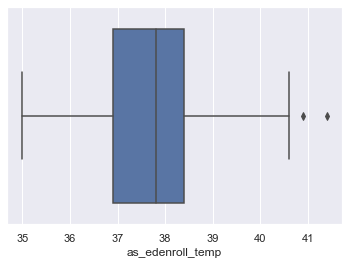

In [19]:
# reference  https://colab.research.google.com/drive/1TZ2L_2Kz3-HDqsFh4bwU8iQyuj95YH_Q?usp=sharing#scrollTo=vtxX_y6zZ2ri
# choose variable to check out 
sns.boxplot(x=df['as_edenroll_temp'])

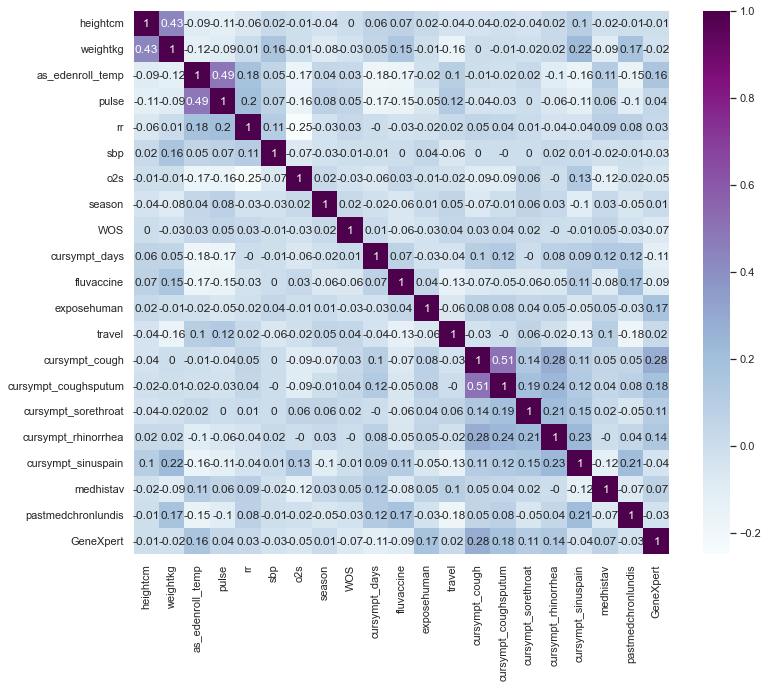

In [20]:
# cirrelation 
fig, ax = plt.subplots(figsize=(12,10)) 
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True, cmap="BuPu")
plt.show()

In [21]:
p0 = list(df.columns.values)
p0.remove('GeneXpert')
X = df[p0]
y = df['GeneXpert']


In [22]:
# train test split

In [23]:
from collections import Counter
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=42,stratify = y)


from collections import Counter
print('All data outcome number:')
print(Counter(y))
print('Train data outcome number:')
print(Counter(y_train))
print('Test data outcome number:')
print(Counter(y_test))


print('Train data done:')
print(X_train.shape)
print('Test data done:')
print(X_test.shape)


All data outcome number:
Counter({1: 793, 0: 738})
Train data outcome number:
Counter({1: 595, 0: 553})
Test data outcome number:
Counter({1: 198, 0: 185})
Train data done:
(1148, 20)
Test data done:
(383, 20)


In [24]:
# original data 
from sklearn import metrics
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from collections import Counter
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
#Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)


# train result
predictions_train_nb = nb.predict(X_train)
accuracy_train_nb = accuracy_score(predictions_train_nb, y_train)
y_scores_train_nb = nb.predict_proba(X_train)
fpr, tpr, threshold = roc_curve(y_train, y_scores_train_nb[:, 1])
auc_train_nb = auc(fpr, tpr)


# test result
predictions_test_nb = nb.predict(X_test)
accuracy_test_nb = accuracy_score(predictions_test_nb, y_test)
y_scores_test_nb = nb.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores_test_nb[:, 1])
auc_test_nb = auc(fpr, tpr)



# RandomForest
rf = RandomForestClassifier(random_state = 35)
rf.fit(X_train, y_train)

# train result
predictions_train_rf = rf.predict(X_train)
accuracy_train_rf = accuracy_score(predictions_train_rf, y_train)
y_scores_train_rf = rf.predict_proba(X_train)
fpr, tpr, threshold = roc_curve(y_train, y_scores_train_rf[:, 1])
auc_train_rf = auc(fpr, tpr)


# test result
predictions_test_rf = rf.predict(X_test)
accuracy_test_rf = accuracy_score(predictions_test_rf, y_test)
y_scores_test_rf = rf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores_test_rf[:, 1])
auc_test_rf = auc(fpr, tpr)



#XGB 
xgb = XGBClassifier( )
xgb.fit(X_train, y_train)


# train result
predictions_train_xgb = xgb.predict(X_train)
accuracy_train_xgb = accuracy_score(predictions_train_xgb, y_train)
y_scores_train_xgb = xgb.predict_proba(X_train)
fpr, tpr, threshold = roc_curve(y_train, y_scores_train_xgb[:, 1])
auc_train_xgb = auc(fpr, tpr)



# test result
predictions_test_xgb = xgb.predict(X_test)
accuracy_test_xgb = accuracy_score(predictions_test_xgb, y_test)
y_scores_test_xgb = xgb.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores_test_xgb[:, 1])
auc_test_xgb = auc(fpr, tpr)


# GBM
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)


# train result
predictions_train_gbm = gbm.predict(X_train)
accuracy_train_gbm = accuracy_score(predictions_train_gbm, y_train)
y_scores_train_gbm = gbm.predict_proba(X_train)
fpr, tpr, threshold = roc_curve(y_train, y_scores_train_gbm[:, 1])
auc_train_gbm = auc(fpr, tpr)


# test result
predictions_test_gbm = gbm.predict(X_test)
accuracy_test_gbm = accuracy_score(predictions_test_gbm, y_test)
y_scores_test_gbm = gbm.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores_test_gbm[:, 1])
auc_test_gbm = auc(fpr, tpr)



# MLP
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)



# train result
predictions_train_mlp = mlp.predict(X_train)
accuracy_train_mlp = accuracy_score(predictions_train_mlp, y_train)
y_scores_train_mlp = mlp.predict_proba(X_train)
fpr, tpr, threshold = roc_curve(y_train, y_scores_train_mlp[:, 1])
auc_train_mlp = auc(fpr, tpr)



# test result
predictions_test_mlp = mlp.predict(X_test)
accuracy_test_mlp = accuracy_score(predictions_test_mlp, y_test)
y_scores_test_mlp = mlp.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores_test_mlp[:, 1])
auc_test_mlp = auc(fpr, tpr)





In [25]:
acc_train = pd.DataFrame( [accuracy_train_nb,accuracy_train_rf,accuracy_train_xgb,accuracy_train_gbm,accuracy_train_mlp])

acc_test =  pd.DataFrame([accuracy_test_nb,accuracy_test_rf,accuracy_test_xgb,accuracy_test_gbm,accuracy_test_mlp])


auc_train = pd.DataFrame([auc_train_nb,auc_train_rf,auc_train_xgb,auc_train_gbm,auc_train_mlp])



auc_test = pd.DataFrame([auc_test_nb,auc_test_rf,auc_test_xgb,auc_test_gbm,auc_test_mlp])


result=pd.DataFrame(pd.concat([acc_train,acc_test,auc_train,auc_test],axis = 1))
result.index = list(['Naive Bayes','Rondom Forest','XGBoost','GBM',"MLP"])
result.columns = list(['Train_accuracy','Test_accuracy','Train_AUC','Test_AUC'])
result


,Train_accuracy,Test_accuracy,Train_AUC,Test_AUC
Naive Bayes,0.648955,0.647520,0.712596,0.720011
Rondom Forest,1.000000,0.702350,1.000000,0.798826
XGBoost,0.862369,0.715405,0.940243,0.815152
GBM,0.872822,0.738903,0.949774,0.820475
MLP,0.608885,0.613577,0.691695,0.703522


In [26]:
# smote tuning 
from imblearn.over_sampling import SMOTE

In [27]:
# default

X_sm0, y_sm0 = SMOTE(random_state=42).fit_resample(X_train, y_train)
print('Train data outcome number:')
print(Counter(y_sm0))

Train data outcome number:
Counter({1: 595, 0: 595})


In [28]:
#Naive Bayes
nb = GaussianNB()
nb.fit(X_sm0, y_sm0 )


# train result
predictions_train_nb = nb.predict(X_sm0)
accuracy_train_nb = accuracy_score(predictions_train_nb, y_sm0)
y_scores_train_nb = nb.predict_proba(X_sm0)
fpr, tpr, threshold = roc_curve(y_sm0, y_scores_train_nb[:, 1])
auc_train_nb = auc(fpr, tpr)


# test result
predictions_test_nb = nb.predict(X_test)
accuracy_test_nb = accuracy_score(predictions_test_nb, y_test)
y_scores_test_nb = nb.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores_test_nb[:, 1])
auc_test_nb = auc(fpr, tpr)



# RandomForest
rf = RandomForestClassifier(random_state = 35)
rf.fit(X_sm0, y_sm0 )

# train result
predictions_train_rf = rf.predict(X_sm0)
accuracy_train_rf = accuracy_score(predictions_train_rf, y_sm0)
y_scores_train_rf = rf.predict_proba(X_sm0)
fpr, tpr, threshold = roc_curve(y_sm0, y_scores_train_rf[:, 1])
auc_train_rf = auc(fpr, tpr)


# test result
predictions_test_rf = rf.predict(X_test)
accuracy_test_rf = accuracy_score(predictions_test_rf, y_test)
y_scores_test_rf = rf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores_test_rf[:, 1])
auc_test_rf = auc(fpr, tpr)



#XGB 
xgb = XGBClassifier( )
xgb.fit(X_sm0, y_sm0 )


# train result
predictions_train_xgb = xgb.predict(X_sm0)
accuracy_train_xgb = accuracy_score(predictions_train_xgb, y_sm0)
y_scores_train_xgb = xgb.predict_proba(X_sm0)
fpr, tpr, threshold = roc_curve(y_sm0, y_scores_train_xgb[:, 1])
auc_train_xgb = auc(fpr, tpr)



# test result
predictions_test_xgb = xgb.predict(X_test)
accuracy_test_xgb = accuracy_score(predictions_test_xgb, y_test)
y_scores_test_xgb = xgb.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores_test_xgb[:, 1])
auc_test_xgb = auc(fpr, tpr)


# GBM
gbm = GradientBoostingClassifier()
gbm.fit(X_sm0, y_sm0 )


# train result
predictions_train_gbm = gbm.predict(X_sm0)
accuracy_train_gbm = accuracy_score(predictions_train_gbm, y_sm0)
y_scores_train_gbm = gbm.predict_proba(X_sm0)
fpr, tpr, threshold = roc_curve(y_sm0, y_scores_train_gbm[:, 1])
auc_train_gbm = auc(fpr, tpr)


# test result
predictions_test_gbm = gbm.predict(X_test)
accuracy_test_gbm = accuracy_score(predictions_test_gbm, y_test)
y_scores_test_gbm = gbm.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores_test_gbm[:, 1])
auc_test_gbm = auc(fpr, tpr)



# MLP
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_sm0, y_sm0 )



# train result
predictions_train_mlp = mlp.predict(X_sm0)
accuracy_train_mlp = accuracy_score(predictions_train_mlp, y_sm0)
y_scores_train_mlp = mlp.predict_proba(X_sm0)
fpr, tpr, threshold = roc_curve(y_sm0, y_scores_train_mlp[:, 1])
auc_train_mlp = auc(fpr, tpr)



# test result
predictions_test_mlp = mlp.predict(X_test)
accuracy_test_mlp = accuracy_score(predictions_test_mlp, y_test)
y_scores_test_mlp = mlp.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores_test_mlp[:, 1])
auc_test_mlp = auc(fpr, tpr)




In [29]:
acc_train = pd.DataFrame( [accuracy_train_nb,accuracy_train_rf,accuracy_train_xgb,accuracy_train_gbm,accuracy_train_mlp])

acc_test =  pd.DataFrame([accuracy_test_nb,accuracy_test_rf,accuracy_test_xgb,accuracy_test_gbm,accuracy_test_mlp])


auc_train = pd.DataFrame([auc_train_nb,auc_train_rf,auc_train_xgb,auc_train_gbm,auc_train_mlp])



auc_test = pd.DataFrame([auc_test_nb,auc_test_rf,auc_test_xgb,auc_test_gbm,auc_test_mlp])


result_smote_default=pd.DataFrame(pd.concat([acc_train,acc_test,auc_train,auc_test],axis = 1))
result_smote_default.index = list(['Naive Bayes','Rondom Forest','XGBoost','GBM',"MLP"])
result_smote_default.columns = list(['Train_accuracy','Test_accuracy','Train_AUC','Test_AUC'])
result_smote_default


,Train_accuracy,Test_accuracy,Train_AUC,Test_AUC
Naive Bayes,0.648739,0.652742,0.716283,0.718073
Rondom Forest,1.000000,0.723238,1.000000,0.822864
XGBoost,0.852941,0.712794,0.934971,0.815015
GBM,0.863025,0.710183,0.947439,0.809937
MLP,0.661345,0.634465,0.724904,0.716162


In [30]:
X_sm1, y_sm1 = SMOTE(random_state=42,sampling_strategy = 0.94).fit_resample(X_train, y_train)
print('Train data outcome number:')
print(Counter(y_sm1))

Train data outcome number:
Counter({1: 595, 0: 559})


In [31]:
#Naive Bayes
nb = GaussianNB()
nb.fit(X_sm1, y_sm1 )


# train result
predictions_train_nb = nb.predict(X_sm1)
accuracy_train_nb = accuracy_score(predictions_train_nb, y_sm1)
y_scores_train_nb = nb.predict_proba(X_sm1)
fpr, tpr, threshold = roc_curve(y_sm1, y_scores_train_nb[:, 1])
auc_train_nb = auc(fpr, tpr)


# test result
predictions_test_nb = nb.predict(X_test)
accuracy_test_nb = accuracy_score(predictions_test_nb, y_test)
y_scores_test_nb = nb.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores_test_nb[:, 1])
auc_test_nb = auc(fpr, tpr)



# RandomForest
rf = RandomForestClassifier(random_state = 35)
rf.fit(X_sm1, y_sm1)

# train result
predictions_train_rf = rf.predict(X_sm1)
accuracy_train_rf = accuracy_score(predictions_train_rf, y_sm1)
y_scores_train_rf = rf.predict_proba(X_sm1)
fpr, tpr, threshold = roc_curve(y_sm1, y_scores_train_rf[:, 1])
auc_train_rf = auc(fpr, tpr)


# test result
predictions_test_rf = rf.predict(X_test)
accuracy_test_rf = accuracy_score(predictions_test_rf, y_test)
y_scores_test_rf = rf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores_test_rf[:, 1])
auc_test_rf = auc(fpr, tpr)



#XGB 
xgb = XGBClassifier( )
xgb.fit(X_sm1, y_sm1 )


# train result
predictions_train_xgb = xgb.predict(X_sm1)
accuracy_train_xgb = accuracy_score(predictions_train_xgb, y_sm1)
y_scores_train_xgb = xgb.predict_proba(X_sm1)
fpr, tpr, threshold = roc_curve(y_sm1, y_scores_train_xgb[:, 1])
auc_train_xgb = auc(fpr, tpr)



# test result
predictions_test_xgb = xgb.predict(X_test)
accuracy_test_xgb = accuracy_score(predictions_test_xgb, y_test)
y_scores_test_xgb = xgb.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores_test_xgb[:, 1])
auc_test_xgb = auc(fpr, tpr)


# GBM
gbm = GradientBoostingClassifier()
gbm.fit(X_sm1, y_sm1 )


# train result
predictions_train_gbm = gbm.predict(X_sm1)
accuracy_train_gbm = accuracy_score(predictions_train_gbm, y_sm1)
y_scores_train_gbm = gbm.predict_proba(X_sm1)
fpr, tpr, threshold = roc_curve(y_sm1, y_scores_train_gbm[:, 1])
auc_train_gbm = auc(fpr, tpr)


# test result
predictions_test_gbm = gbm.predict(X_test)
accuracy_test_gbm = accuracy_score(predictions_test_gbm, y_test)
y_scores_test_gbm = gbm.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores_test_gbm[:, 1])
auc_test_gbm = auc(fpr, tpr)



# MLP
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_sm1, y_sm1 )



# train result
predictions_train_mlp = mlp.predict(X_sm1)
accuracy_train_mlp = accuracy_score(predictions_train_mlp, y_sm1)
y_scores_train_mlp = mlp.predict_proba(X_sm1)
fpr, tpr, threshold = roc_curve(y_sm1, y_scores_train_mlp[:, 1])
auc_train_mlp = auc(fpr, tpr)



# test result
predictions_test_mlp = mlp.predict(X_test)
accuracy_test_mlp = accuracy_score(predictions_test_mlp, y_test)
y_scores_test_mlp = mlp.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores_test_mlp[:, 1])
auc_test_mlp = auc(fpr, tpr)



In [32]:
acc_train = pd.DataFrame( [accuracy_train_nb,accuracy_train_rf,accuracy_train_xgb,accuracy_train_gbm,accuracy_train_mlp])

acc_test =  pd.DataFrame([accuracy_test_nb,accuracy_test_rf,accuracy_test_xgb,accuracy_test_gbm,accuracy_test_mlp])


auc_train = pd.DataFrame([auc_train_nb,auc_train_rf,auc_train_xgb,auc_train_gbm,auc_train_mlp])



auc_test = pd.DataFrame([auc_test_nb,auc_test_rf,auc_test_xgb,auc_test_gbm,auc_test_mlp])


result_smote_try1=pd.DataFrame(pd.concat([acc_train,acc_test,auc_train,auc_test],axis = 1))
result_smote_try1.index = list(['Naive Bayes','Rondom Forest','XGBoost','GBM',"MLP"])
result_smote_try1.columns = list(['Train_accuracy','Test_accuracy','Train_AUC','Test_AUC'])
result_smote_try1


,Train_accuracy,Test_accuracy,Train_AUC,Test_AUC
Naive Bayes,0.646447,0.650131,0.711703,0.720257
Rondom Forest,1.000000,0.731070,1.000000,0.802812
XGBoost,0.868284,0.710183,0.942662,0.812585
GBM,0.863085,0.712794,0.946826,0.813896
MLP,0.634315,0.608355,0.723128,0.717827


In [33]:
# comparison - original vs   smote default  vs  smote 1

In [34]:
print(Counter(y_train))

Counter({1: 595, 0: 553})


In [35]:
result

,Train_accuracy,Test_accuracy,Train_AUC,Test_AUC
Naive Bayes,0.648955,0.647520,0.712596,0.720011
Rondom Forest,1.000000,0.702350,1.000000,0.798826
XGBoost,0.862369,0.715405,0.940243,0.815152
GBM,0.872822,0.738903,0.949774,0.820475
MLP,0.608885,0.613577,0.691695,0.703522


In [36]:
print(Counter(y_sm0))

Counter({1: 595, 0: 595})


In [37]:
result_smote_default

,Train_accuracy,Test_accuracy,Train_AUC,Test_AUC
Naive Bayes,0.648739,0.652742,0.716283,0.718073
Rondom Forest,1.000000,0.723238,1.000000,0.822864
XGBoost,0.852941,0.712794,0.934971,0.815015
GBM,0.863025,0.710183,0.947439,0.809937
MLP,0.661345,0.634465,0.724904,0.716162


In [38]:
print(Counter(y_sm1))

Counter({1: 595, 0: 559})


In [39]:
result_smote_try1

,Train_accuracy,Test_accuracy,Train_AUC,Test_AUC
Naive Bayes,0.646447,0.650131,0.711703,0.720257
Rondom Forest,1.000000,0.731070,1.000000,0.802812
XGBoost,0.868284,0.710183,0.942662,0.812585
GBM,0.863085,0.712794,0.946826,0.813896
MLP,0.634315,0.608355,0.723128,0.717827


In [40]:
y_train

700     1
849     0
428     1
658     0
1322    1
       ..
1275    1
1089    0
241     0
1373    1
949     0
Name: GeneXpert, Length: 1148, dtype: int64

In [41]:
from boruta import BorutaPy

# bourta 

y_train = y_train.ravel()

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(np.array(X_train), y_train)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_



Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	10
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	10
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	10
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	10
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	10
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	10
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	10
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	10
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	10
I

array([ 6,  3,  1,  1,  7,  1,  1,  8,  1,  1,  9,  3, 13,  1,  2, 10,  5,
       11, 14, 12])

In [42]:
feature_df = pd.DataFrame(X_train.columns.tolist(),columns = ['features'])
feature_df['rank'] =feat_selector.ranking_
feature_df


,features,rank
0,heightcm,6
1,weightkg,3
2,as_edenroll_temp,1
3,pulse,1
4,rr,7
5,sbp,1
6,o2s,1
7,season,8
8,WOS,1
9,cursympt_days,1


In [43]:
feature_df.sort_values(by=['rank'])

,features,rank
9,cursympt_days,1
2,as_edenroll_temp,1
3,pulse,1
5,sbp,1
6,o2s,1
8,WOS,1
13,cursympt_cough,1
14,cursympt_coughsputum,2
1,weightkg,3
11,exposehuman,3


In [44]:
# show importance 

In [45]:
# default rf 
rf = RandomForestClassifier(random_state = 35)
rf.fit(X_train, y_train)

sorted_idx = rf.feature_importances_.argsort()
# rf importance

data_sort_imp = {
    "Features_sort": X.columns[sorted_idx],
    "Importance": rf.feature_importances_[sorted_idx]
}
 
df_imp = pd.DataFrame(data_sort_imp)
df_imp

,Features_sort,Importance
0,medhistav,0.009293
1,cursympt_sinuspain,0.013862
2,pastmedchronlundis,0.015193
3,travel,0.017459
4,exposehuman,0.017857
5,cursympt_sorethroat,0.018180
6,fluvaccine,0.019594
7,cursympt_rhinorrhea,0.019971
8,cursympt_coughsputum,0.024462
9,season,0.034744


Text(0.5, 0, 'RandomForest Feature Importance-Top 20 Features')

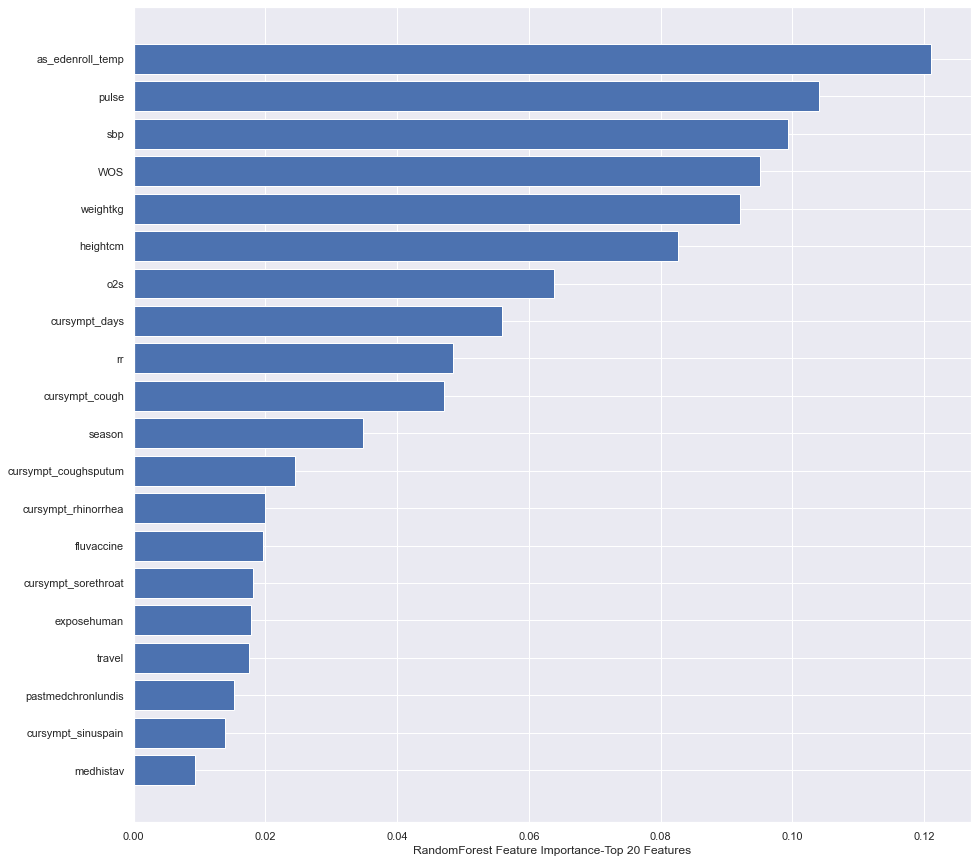

In [46]:
plt.figure(figsize=(15,15))
plt.rcParams.update({'font.size': 16})
plt.barh(df_imp.Features_sort, df_imp.Importance)
plt.xlabel("RandomForest Feature Importance-Top 20 Features")

In [47]:
from sklearn import metrics

In [48]:

#Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)


# train result
predictions_train_nb = nb.predict(X_train)
accuracy_train_nb = accuracy_score(predictions_train_nb, y_train)
y_scores_train_nb = nb.predict_proba(X_train)
fpr, tpr, threshold = roc_curve(y_train, y_scores_train_nb[:, 1])
auc_train_nb = auc(fpr, tpr)


# test result
predictions_test_nb = nb.predict(X_test)
accuracy_test_nb = accuracy_score(predictions_test_nb, y_test)
y_scores_test_nb = nb.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores_test_nb[:, 1])
auc_test_nb = auc(fpr, tpr)



# RandomForest
rf = RandomForestClassifier(random_state = 35)
rf.fit(X_train, y_train)

# train result
predictions_train_rf = rf.predict(X_train)
accuracy_train_rf = accuracy_score(predictions_train_rf, y_train)
y_scores_train_rf = rf.predict_proba(X_train)
fpr, tpr, threshold = roc_curve(y_train, y_scores_train_rf[:, 1])
auc_train_rf = auc(fpr, tpr)


# test result
predictions_test_rf = rf.predict(X_test)
accuracy_test_rf = accuracy_score(predictions_test_rf, y_test)
y_scores_test_rf = rf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores_test_rf[:, 1])
auc_test_rf = auc(fpr, tpr)



#XGB 
xgb = XGBClassifier( )
xgb.fit(X_train, y_train)


# train result
predictions_train_xgb = xgb.predict(X_train)
accuracy_train_xgb = accuracy_score(predictions_train_xgb, y_train)
y_scores_train_xgb = xgb.predict_proba(X_train)
fpr, tpr, threshold = roc_curve(y_train, y_scores_train_xgb[:, 1])
auc_train_xgb = auc(fpr, tpr)



# test result
predictions_test_xgb = xgb.predict(X_test)
accuracy_test_xgb = accuracy_score(predictions_test_xgb, y_test)
y_scores_test_xgb = xgb.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores_test_xgb[:, 1])
auc_test_xgb = auc(fpr, tpr)


# GBM
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)


# train result
predictions_train_gbm = gbm.predict(X_train)
accuracy_train_gbm = accuracy_score(predictions_train_gbm, y_train)
y_scores_train_gbm = gbm.predict_proba(X_train)
fpr, tpr, threshold = roc_curve(y_train, y_scores_train_gbm[:, 1])
auc_train_gbm = auc(fpr, tpr)


# test result
predictions_test_gbm = gbm.predict(X_test)
accuracy_test_gbm = accuracy_score(predictions_test_gbm, y_test)
y_scores_test_gbm = gbm.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores_test_gbm[:, 1])
auc_test_gbm = auc(fpr, tpr)



# MLP
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)



# train result
predictions_train_mlp = mlp.predict(X_train)
accuracy_train_mlp = accuracy_score(predictions_train_mlp, y_train)
y_scores_train_mlp = mlp.predict_proba(X_train)
fpr, tpr, threshold = roc_curve(y_train, y_scores_train_mlp[:, 1])
auc_train_mlp = auc(fpr, tpr)



# test result
predictions_test_mlp = mlp.predict(X_test)
accuracy_test_mlp = accuracy_score(predictions_test_mlp, y_test)
y_scores_test_mlp = mlp.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores_test_mlp[:, 1])
auc_test_mlp = auc(fpr, tpr)




In [49]:
acc_train = pd.DataFrame( [accuracy_train_nb,accuracy_train_rf,accuracy_train_xgb,accuracy_train_gbm,accuracy_train_mlp])

acc_test =  pd.DataFrame([accuracy_test_nb,accuracy_test_rf,accuracy_test_xgb,accuracy_test_gbm,accuracy_test_mlp])


auc_train = pd.DataFrame([auc_train_nb,auc_train_rf,auc_train_xgb,auc_train_gbm,auc_train_mlp])



auc_test = pd.DataFrame([auc_test_nb,auc_test_rf,auc_test_xgb,auc_test_gbm,auc_test_mlp])


result=pd.DataFrame(pd.concat([acc_train,acc_test,auc_train,auc_test],axis = 1))
result.index = list(['Naive Bayes','Rondom Forest','XGBoost','GBM',"MLP"])
result.columns = list(['Train_accuracy','Test_accuracy','Train_AUC','Test_AUC'])
result


,Train_accuracy,Test_accuracy,Train_AUC,Test_AUC
Naive Bayes,0.648955,0.647520,0.712596,0.720011
Rondom Forest,1.000000,0.702350,1.000000,0.798826
XGBoost,0.862369,0.715405,0.940243,0.815152
GBM,0.872822,0.738903,0.949774,0.820420
MLP,0.640244,0.618799,0.756129,0.699236


In [50]:
# naive
predictions_train_naive = nb.predict(X_train)
predictions_test_naive = nb.predict(X_test)
y_scores_train =  nb.predict_proba(X_train)
predictions_train_prob_naive = y_scores_train[:, 1]
y_scores_test =  nb.predict_proba(X_test)
predictions_test_prob_naive = y_scores_test[:, 1]


#Random Forest
predictions_train_rf =rf.predict(X_train)
predictions_test_rf = rf.predict(X_test)
y_scores_train =  rf.predict_proba(X_train)
predictions_train_prob_rf = y_scores_train[:, 1]
y_scores_test =  rf.predict_proba(X_test)
predictions_test_prob_rf = y_scores_test[:, 1]

#XGBoost
predictions_train_xgb =xgb.predict(X_train)
predictions_test_xgb = xgb.predict(X_test)
y_scores_train =  xgb.predict_proba(X_train)
predictions_train_prob_xgb = y_scores_train[:, 1]
y_scores_test =  xgb.predict_proba(X_test)
predictions_test_prob_xgb = y_scores_test[:, 1]


#gbm
predictions_train_gbm =gbm.predict(X_train)
predictions_test_gbm = gbm.predict(X_test)
y_scores_train =  gbm.predict_proba(X_train)
predictions_train_prob_gbm = y_scores_train[:, 1]
y_scores_test =  gbm.predict_proba(X_test)
predictions_test_prob_gbm = y_scores_test[:, 1]


#gbm
predictions_train_mlp =mlp.predict(X_train)
predictions_test_mlp = mlp.predict(X_test)
y_scores_train =  mlp.predict_proba(X_train)
predictions_train_prob_mlp = y_scores_train[:, 1]
y_scores_test =  mlp.predict_proba(X_test)
predictions_test_prob_mlp = y_scores_test[:, 1]



<Figure size 432x288 with 0 Axes>

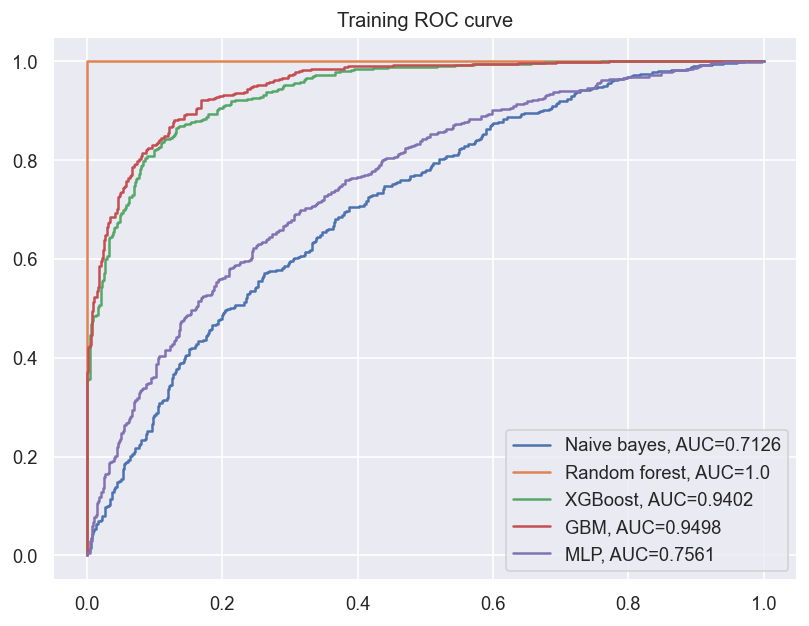

In [51]:
from sklearn.metrics import roc_auc_score
#set up plotting area
plt.figure(0).clf()
plt.figure(figsize=(8, 6), dpi=120)

fpr, tpr, _ = metrics.roc_curve(y_train, predictions_train_prob_naive)
auc = round(metrics.roc_auc_score(y_train, predictions_train_prob_naive), 4)
plt.plot(fpr,tpr,label="Naive bayes, AUC="+str(auc))


fpr, tpr, _ = metrics.roc_curve(y_train, predictions_train_prob_rf)
auc = round(metrics.roc_auc_score(y_train, predictions_train_prob_rf), 4)
plt.plot(fpr,tpr,label="Random forest, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_train, predictions_train_prob_xgb)
auc = round(metrics.roc_auc_score(y_train, predictions_train_prob_xgb), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_train, predictions_train_prob_gbm)
auc = round(metrics.roc_auc_score(y_train, predictions_train_prob_gbm), 4)
plt.plot(fpr,tpr,label="GBM, AUC="+str(auc))


fpr, tpr, _ = metrics.roc_curve(y_train, predictions_train_prob_mlp)
auc = round(metrics.roc_auc_score(y_train, predictions_train_prob_mlp), 4)
plt.plot(fpr,tpr,label="MLP, AUC="+str(auc))

plt.title('Training ROC curve')
#add legend
plt.legend()


<Figure size 432x288 with 0 Axes>

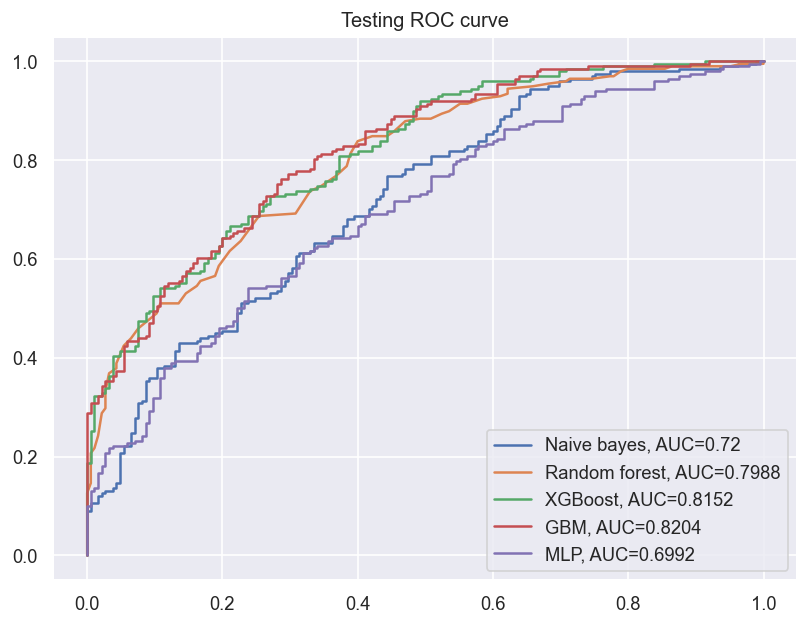

In [52]:
#set up plotting area
plt.figure(0).clf()
plt.figure(figsize=(8, 6), dpi=120)


fpr, tpr, _ = metrics.roc_curve(y_test, predictions_test_prob_naive)
auc = round(metrics.roc_auc_score(y_test, predictions_test_prob_naive), 4)
plt.plot(fpr,tpr,label="Naive bayes, AUC="+str(auc))


fpr, tpr, _ = metrics.roc_curve(y_test, predictions_test_prob_rf)
auc = round(metrics.roc_auc_score(y_test, predictions_test_prob_rf), 4)
plt.plot(fpr,tpr,label="Random forest, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, predictions_test_prob_xgb)
auc = round(metrics.roc_auc_score(y_test, predictions_test_prob_xgb), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, predictions_test_prob_gbm)
auc = round(metrics.roc_auc_score(y_test, predictions_test_prob_gbm), 4)
plt.plot(fpr,tpr,label="GBM, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, predictions_test_prob_mlp)
auc = round(metrics.roc_auc_score(y_test, predictions_test_prob_mlp), 4)
plt.plot(fpr,tpr,label="MLP, AUC="+str(auc))


plt.title('Testing ROC curve')
#add legend
plt.legend()

<Figure size 432x288 with 0 Axes>

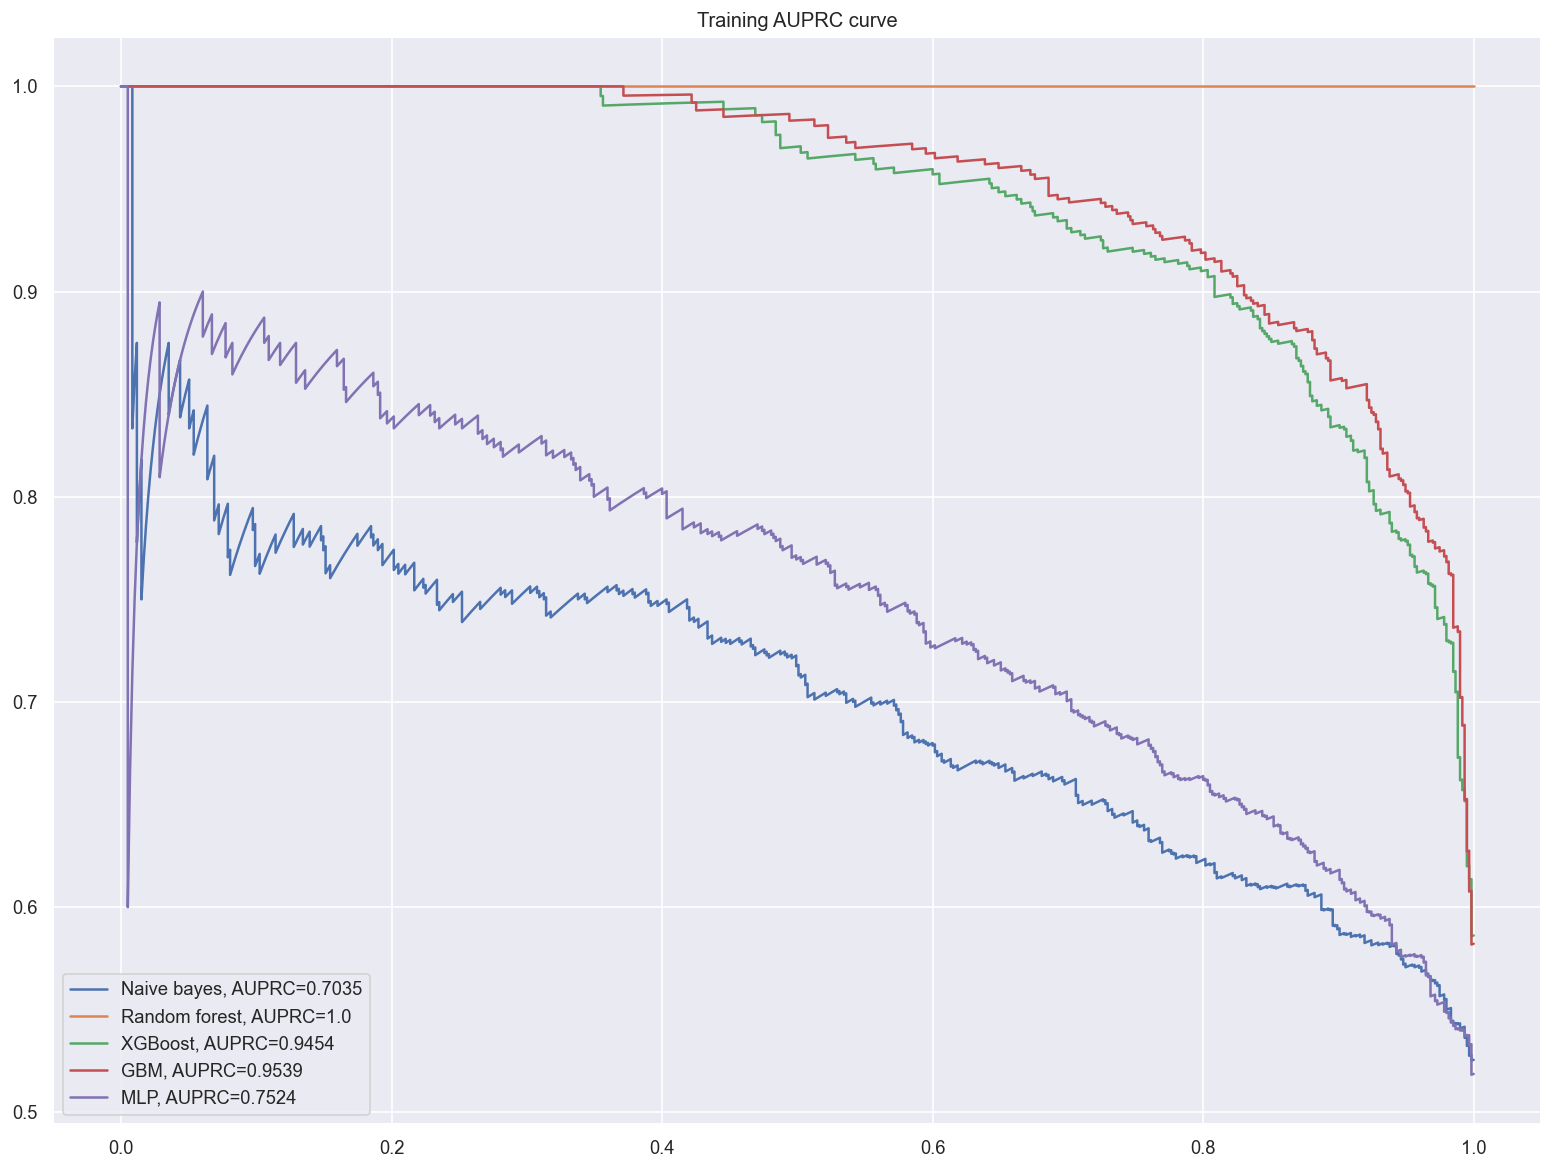

In [53]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
#set up plotting area
plt.figure(0).clf()
plt.figure(figsize=(16, 12), dpi=120)

#fit logistic regression model and plot ROC curv
precision, recall, thresholds = precision_recall_curve(y_train, y_scores_train_nb[:, 1])
auprc = round(average_precision_score(y_train, y_scores_train_nb[:, 1]), 4)
plt.plot(recall,precision,label="Naive bayes, AUPRC="+str(auprc))


precision, recall, thresholds = precision_recall_curve(y_train, y_scores_train_rf[:, 1])
auprc = round(average_precision_score(y_train, y_scores_train_rf[:, 1]), 4)
plt.plot(recall,precision,label="Random forest, AUPRC="+str(auprc))

precision, recall, thresholds = precision_recall_curve(y_train, y_scores_train_xgb[:, 1])
auprc = round(average_precision_score(y_train, y_scores_train_xgb[:, 1]), 4)
plt.plot(recall,precision,label="XGBoost, AUPRC="+str(auprc))

precision, recall, thresholds = precision_recall_curve(y_train, y_scores_train_gbm[:, 1])
auprc = round(average_precision_score(y_train, y_scores_train_gbm[:, 1]), 4)
plt.plot(recall,precision,label="GBM, AUPRC="+str(auprc))

precision, recall, thresholds = precision_recall_curve(y_train, y_scores_train_mlp[:, 1])
auprc = round(average_precision_score(y_train, y_scores_train_mlp[:, 1]), 4)
plt.plot(recall,precision,label="MLP, AUPRC="+str(auprc))

plt.title('Training AUPRC curve')
#add legend
plt.legend()

<Figure size 432x288 with 0 Axes>

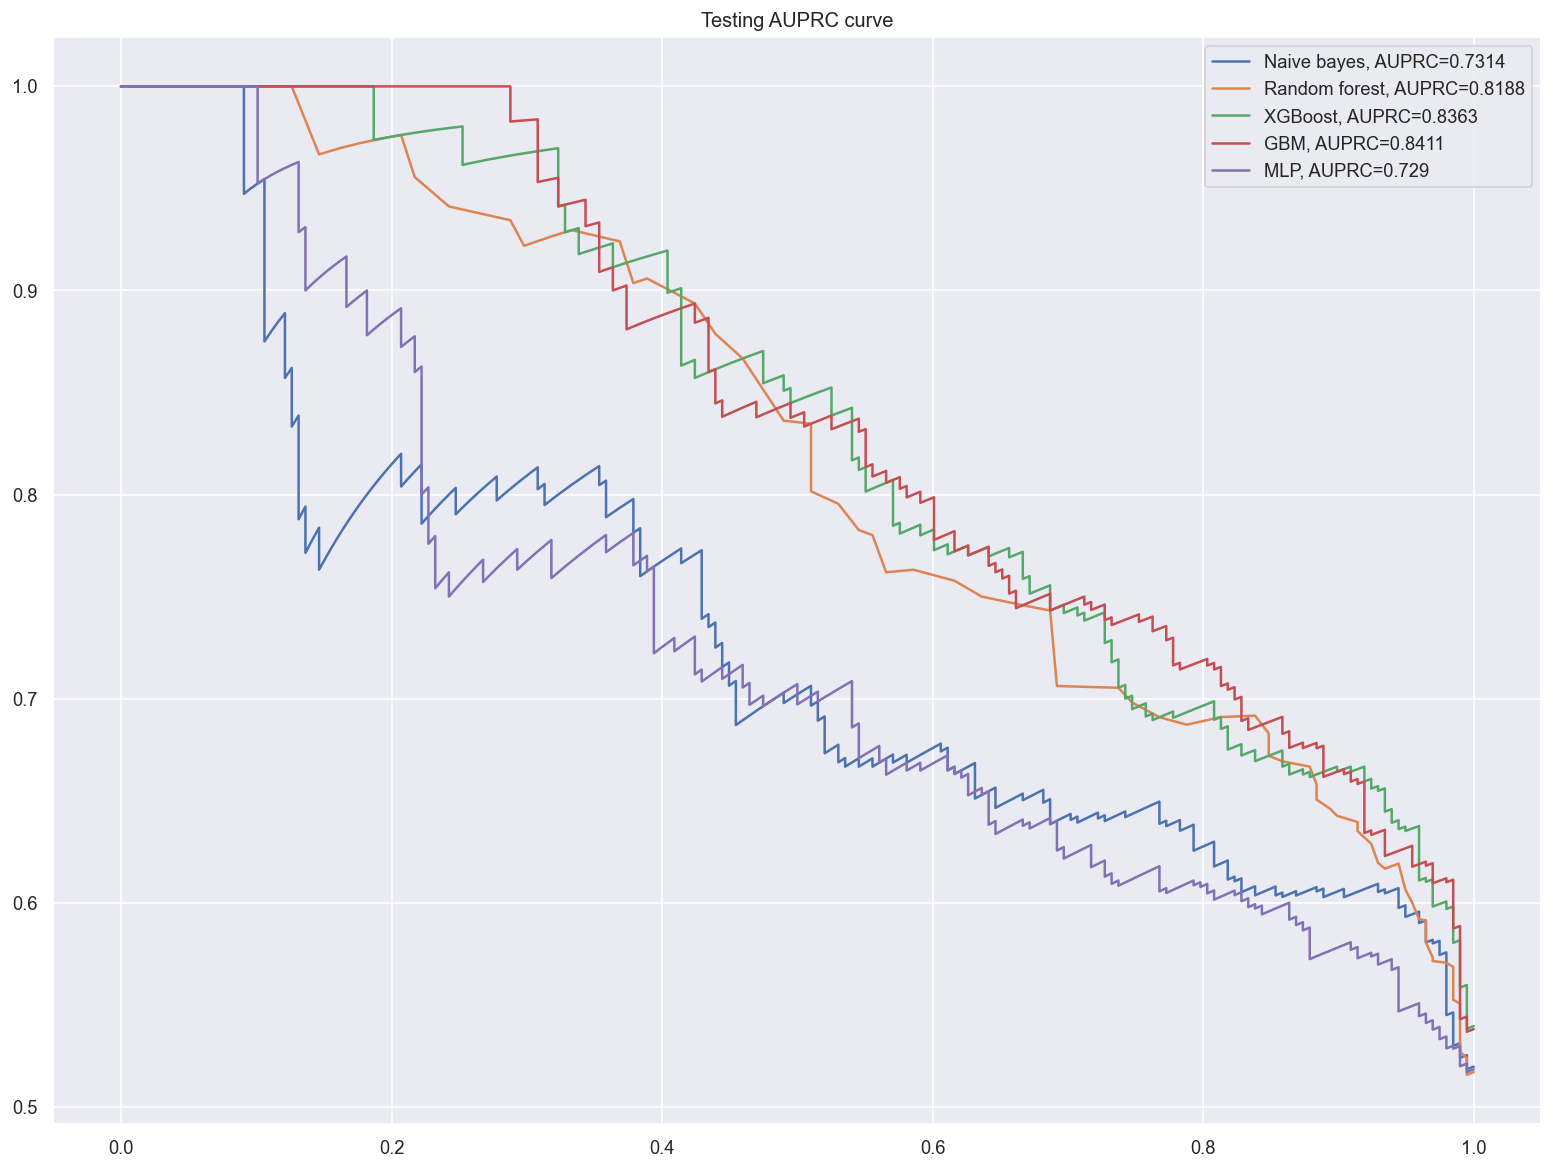

In [54]:
#set up plotting area
plt.figure(0).clf()
plt.figure(figsize=(16, 12), dpi=120)

#fit logistic regression model and plot ROC curv
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_test_nb[:, 1])
auprc = round(average_precision_score(y_test, y_scores_test_nb[:, 1]), 4)
plt.plot(recall,precision,label="Naive bayes, AUPRC="+str(auprc))

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_test_rf[:, 1])
auprc = round(average_precision_score(y_test, y_scores_test_rf[:, 1]), 4)
plt.plot(recall,precision,label="Random forest, AUPRC="+str(auprc))

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_test_xgb[:, 1])
auprc = round(average_precision_score(y_test, y_scores_test_xgb[:, 1]), 4)
plt.plot(recall,precision,label="XGBoost, AUPRC="+str(auprc))

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_test_gbm[:, 1])
auprc = round(average_precision_score(y_test, y_scores_test_gbm[:, 1]), 4)
plt.plot(recall,precision,label="GBM, AUPRC="+str(auprc))


precision, recall, thresholds = precision_recall_curve(y_test, y_scores_test_mlp[:, 1])
auprc = round(average_precision_score(y_test, y_scores_test_mlp[:, 1]), 4)
plt.plot(recall,precision,label="MLP, AUPRC="+str(auprc))

plt.title('Testing AUPRC curve')
#add legend
plt.legend()

In [55]:
# tuning

In [56]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

random_grid= {
    'bootstrap': [True,False],
    'max_depth': [10,15,20],
    'max_features': [2, 3,4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}
from sklearn.ensemble import RandomForestClassifier
rf1= RandomForestClassifier(random_state=35)

#Random search of parameters, using 5 fold cross validation, search across 100 different combinations, and use all available cores
xg_random = RandomizedSearchCV(estimator = rf1, param_distributions=random_grid,
                              n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)



print('random grid search model:')

xg_random.fit(X_train,y_train)
xg_random.best_params_




rf = RandomForestClassifier(**xg_random.best_params_)

rf.fit(X_train, y_train)

# training result
# predict probabilities for test set
yhat_probs = rf.predict_proba(X_train)
# predict crisp classes for test set
yhat_classes = rf.predict(X_train)
# reduce to 1d array
yhat_probs = yhat_probs[:, 1]
yhat_classes = yhat_classes

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, yhat_classes)


# ROC AUC
auc = roc_auc_score(y_train, yhat_probs)

train_acc = pd.Series(accuracy)
train_auc = pd.Series(auc)

# testing result

# predict probabilities for test set
yhat_probs = rf.predict_proba(X_test)
# predict crisp classes for test set
yhat_classes = rf.predict(X_test)
# reduce to 1d array
yhat_probs = yhat_probs[:, 1]
yhat_classes = yhat_classes

accuracy = accuracy_score(y_test, yhat_classes)


# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)


test_acc = pd.Series(accuracy)
test_auc = pd.Series(auc)



result_random_grid_search=pd.DataFrame(pd.concat([train_acc,test_acc,train_auc,test_auc],axis = 1))
result_random_grid_search.index = list(['Rondom Forest'])
result_random_grid_search.columns = list(['Train_accuracy','Test_accuracy','Train_AUC','Test_AUC'])
result_random_grid_search

random grid search model:
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=4, max_features=3, max_depth=20, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=4, max_features=3, max_depth=20, bootstrap=True, total=   0.1s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=4, max_features=3, max_depth=20, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=4, max_features=3, max_depth=20, bootstrap=True, total=   0.1s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=4, max_features=3, max_depth=20, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=4, max_features=3, max_depth=20, bootstrap=True, total=   0.1s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=4, max_features=3, max_depth=20, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=4, max_features=3, max_depth=20, bootstrap=True, total=   0.1s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=4, max_features=3, max_depth=20, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=4, max_features=3, max_depth=20, bootstrap=True, total=   0.1s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=3, max_features=2, max_depth=20, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=8, min_samples_lea

[CV]  n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=3, max_depth=10, bootstrap=False, total=   0.1s
[CV] n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=3, max_depth=10, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=3, max_depth=10, bootstrap=False, total=   0.1s
[CV] n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=3, max_depth=10, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=3, max_depth=10, bootstrap=False, total=   0.1s
[CV] n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=3, max_depth=10, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=3, max_depth=10, bootstrap=False, total=   0.1s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_features=4, max_depth=15, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=10

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    7.8s finished


,Train_accuracy,Test_accuracy,Train_AUC,Test_AUC
Rondom Forest,0.971254,0.704961,0.996994,0.800764


In [57]:
#------------------------------------------------------method 2
from sklearn.model_selection import GridSearchCV


random_grid= {
    'bootstrap': [True,False],
    'max_depth': [10,15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4,],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200]
}



print(' grid search model:')


rf2= RandomForestClassifier(random_state=35)





clf = GridSearchCV(estimator=rf2, 
                   param_grid=random_grid, cv = 5,
                   verbose=1)
clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)



rf = RandomForestClassifier(**xg_random.best_params_)

rf.fit(X_train, y_train)

# training result
# predict probabilities for test set
yhat_probs = rf.predict_proba(X_train)
# predict crisp classes for test set
yhat_classes = rf.predict(X_train)
# reduce to 1d array
yhat_probs = yhat_probs[:, 1]
yhat_classes = yhat_classes

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, yhat_classes)


# ROC AUC
auc = roc_auc_score(y_train, yhat_probs)

train_acc = pd.Series(accuracy)
train_auc = pd.Series(auc)

# testing result

# predict probabilities for test set
yhat_probs = rf.predict_proba(X_test)
# predict crisp classes for test set
yhat_classes = rf.predict(X_test)
# reduce to 1d array
yhat_probs = yhat_probs[:, 1]
yhat_classes = yhat_classes

accuracy = accuracy_score(y_test, yhat_classes)


# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)


test_acc = pd.Series(accuracy)
test_auc = pd.Series(auc)



result_grid_search=pd.DataFrame(pd.concat([train_acc,test_acc,train_auc,test_auc],axis = 1))
result_grid_search.index = list(['Rondom Forest'])
result_grid_search.columns = list(['Train_accuracy','Test_accuracy','Train_AUC','Test_AUC'])
result_grid_search

 grid search model:
Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   55.7s finished


Best parameters: {'bootstrap': False, 'max_depth': 15, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}


,Train_accuracy,Test_accuracy,Train_AUC,Test_AUC
Rondom Forest,0.971254,0.723238,0.996581,0.809582


In [58]:
from hyperopt import tpe,hp,Trials,STATUS_OK
from hyperopt.fmin import fmin
import numpy as np
seed = 48

def objective1(params):
    est=int(params['n_estimators'])
    md=int(params['max_depth'])
    msl=int(params['min_samples_leaf'])
    mf=int(params['max_features'])
    mss=int(params['min_samples_split'])
    model=RandomForestClassifier(n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss,max_features = mf)
    model.fit(X_train,y_train)
    yhat_probs = model.predict_proba(X_train)
    yhat_probs = yhat_probs[:, 1]
    score = roc_auc_score(y_train, yhat_probs)
    return {'loss': -score, 'status': STATUS_OK}






print('bayes opt model-auc:')

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,200),
           'max_depth':hp.uniform('max_depth',10,15),
            'max_features':hp.uniform('max_features',2,3),
           'min_samples_leaf':hp.uniform('min_samples_leaf',3,4),
           'min_samples_split':hp.uniform('min_samples_split',8,10)}
    best=fmin(fn=objective1,space=params,algo=tpe.suggest,trials=trial,max_evals=300,rstate=np.random.default_rng(seed))
    return best

trial=Trials()
best=optimize(trial)


est=int(best['n_estimators'])
md=int(best['max_depth'])
msl=int(best['min_samples_leaf'])
mf=int(best['max_features'])
mss=int(best['min_samples_split'])
rf=RandomForestClassifier(n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss,max_features = mf)
rf.fit(X_train,y_train)


rf.fit(X_train, y_train)

# training result
# predict probabilities for test set
yhat_probs = rf.predict_proba(X_train)
# predict crisp classes for test set
yhat_classes = rf.predict(X_train)
# reduce to 1d array
yhat_probs = yhat_probs[:, 1]
yhat_classes = yhat_classes

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, yhat_classes)


# ROC AUC
auc = roc_auc_score(y_train, yhat_probs)

train_acc = pd.Series(accuracy)
train_auc = pd.Series(auc)

# testing result

# predict probabilities for test set
yhat_probs = rf.predict_proba(X_test)
# predict crisp classes for test set
yhat_classes = rf.predict(X_test)
# reduce to 1d array
yhat_probs = yhat_probs[:, 1]
yhat_classes = yhat_classes

accuracy = accuracy_score(y_test, yhat_classes)


# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)


test_acc = pd.Series(accuracy)
test_auc = pd.Series(auc)





# total time taken
print('random bayes opt model  -auc done:')


result_bayes_opt=pd.DataFrame(pd.concat([train_acc,test_acc,train_auc,test_auc],axis = 1))
result_bayes_opt.index = list(['Rondom Forest'])
result_bayes_opt.columns = list(['Train_accuracy','Test_accuracy','Train_AUC','Test_AUC'])
result_bayes_opt

bayes opt model-auc:
100%|█████████████████████████████████████████████| 300/300 [01:03<00:00,  4.73trial/s, best loss: -0.9907365477836705]
random bayes opt model  -auc done:


,Train_accuracy,Test_accuracy,Train_AUC,Test_AUC
Rondom Forest,0.947735,0.710183,0.98936,0.809446
